In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime
from datetime import timedelta

virus=pd.read_csv("C:/Users/localadmin/Desktop/data/raw data/virus_utf8_final.csv")

In [2]:
print(virus.shape)
print(virus.columns)
virus=virus.iloc[:virus.shape[0]-3, 3:virus.shape[1]-1] #deleting first three columns and last 'etc' column

(1834, 9)
Index(['Unnamed: 0', 'virus', 'farmer', 'location', 'date', 'species', 'num',
       'institution', 'etc'],
      dtype='object')


In [3]:
virus.dtypes

location       object
date           object
species        object
num             int64
institution    object
dtype: object

In [4]:
str(virus.date[0]).split() #괄호 안은 진단일이고 괄호밖은 발생일이다.
diag=[]
datenew=[]
for i in range(0, virus.shape[0]):
    a=dt.datetime.strptime(str(virus.date[i]).split()[1][1:11], '%Y-%m-%d')
    diag.append(a.date())
    b=dt.datetime.strptime(str(virus.date[i]).split()[0], '%Y-%m-%d')
    datenew.append(b.date())
virus['diag']=diag
virus['date']=datenew

In [5]:
virus_bydate=virus.loc[:, 'num'].groupby(virus.date).count()
max(virus_bydate)

18

In [6]:
virus_bydate.index[np.argmax(virus_bydate)]

datetime.date(2019, 4, 30)

In [7]:
#전체날짜 입력받기
def date_gen(stt, end):
    from datetime import datetime
    from datetime import timedelta

    dates=[(stt + timedelta(days=i)) for i in range((end-stt).days+1)]
    return dates

day_stt=datetime.strptime("2017-09-22", '%Y-%m-%d')
day_end=datetime.strptime("2022-10-15", '%Y-%m-%d')
day_stt=day_stt.date()
day_end=day_end.date()
dates=date_gen(day_stt, day_end)
print(len(dates), "\n", type(dates), '\n', dates[0:2])
len(virus_bydate)
print(round(len(dates)/365, 1), "년동안 낭충봉아부패병 발병 비율은 ", round((len(virus_bydate)/len(dates))*100,1), "% 이다.")

1850 
 <class 'list'> 
 [datetime.date(2017, 9, 22), datetime.date(2017, 9, 23)]
5.1 년동안 낭충봉아부패병 발병 비율은  38.1 % 이다.


In [8]:
virus_bydate.index

Index([2017-09-27, 2017-09-28, 2017-10-18, 2017-10-24, 2017-11-23, 2017-12-04,
       2018-02-08, 2018-02-25, 2018-02-28, 2018-03-01,
       ...
       2022-08-09, 2022-08-12, 2022-08-17, 2022-08-19, 2022-08-29, 2022-09-06,
       2022-09-11, 2022-09-14, 2022-09-19, 2022-09-23],
      dtype='object', name='date', length=705)

*2017년 9월 22일부터 2022년 10월 15일까지 전체 날짜를 입력받고 발생데이터를 더미변수로 포함시켜야 한다. <br>
 
*지역을 도, 시, 군 등으로 쪼개고 지역단위로 쪼갰을때 발생양상은 어떤지 분석하고 지역구분을 확정지어야 기후 데이터를 가져올 수 있다. 

In [9]:
locs=[]
for loc in virus.location:
    a=str(loc).split()
    locs.append(a)
korea=pd.DataFrame(locs)

In [10]:
korea

,0,1,2,3,4
0,경상북도,영주시,단산면,옥대리,None
1,경상북도,영주시,단산면,좌석리,None
2,경상북도,경주시,건천읍,신평리,None
3,인천광역시,강화군,양도면,능내리,None
4,인천광역시,강화군,내가면,고천리,None
...,...,...,...,...,...
1826,경기도,양평군,용문면,다문리,None
1827,강원도,강릉시,연곡면,행정리,None
1828,강원도,삼척시,도계읍,심포리,None
1829,전라남도,강진군,대구면,용운리,None


In [11]:
korea_first=korea.iloc[:, 0].groupby(korea.iloc[:, 0]).count()
korea_first.sort_values(ascending=False) #전국을 8도로 나누고 각 지역별 감염건수를 카운트한다.

0
강원도        565
경상북도       338
전라남도       224
경기도        177
전라북도       157
경상남도       156
충청북도        94
충청남도        49
제주특별자치도     22
대구광역시       15
부산광역시       12
인천광역시        9
울산광역시        6
광주광역시        5
대전광역시        1
세종특별자치시      1
Name: 0, dtype: int64

['Malgun Gothic']


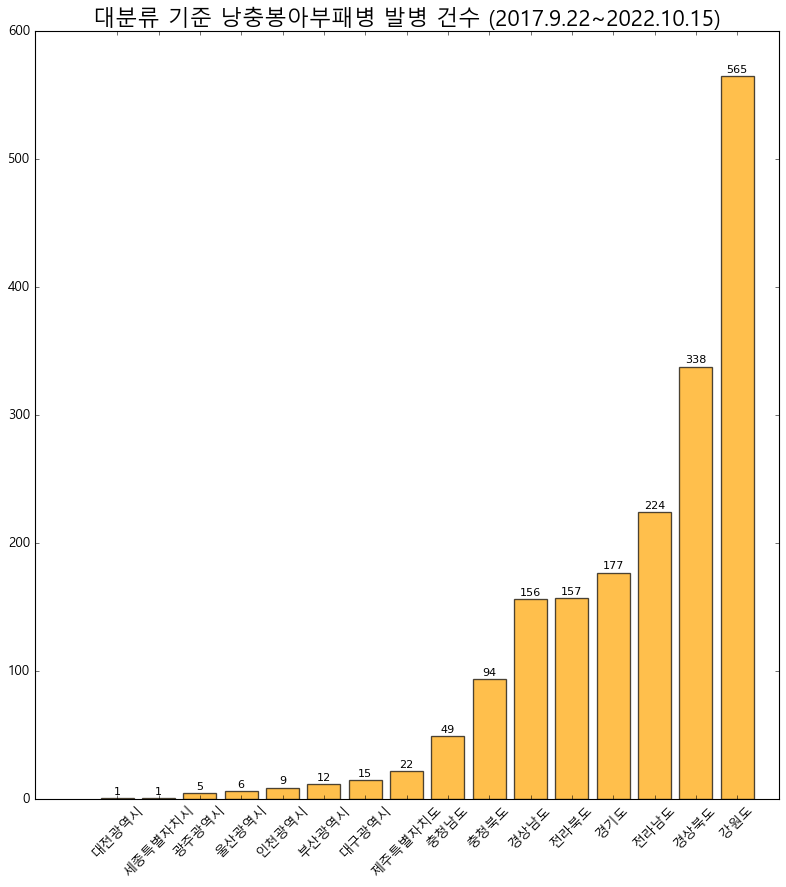

In [13]:
korea_first=korea.iloc[:, 0].groupby(korea.iloc[:, 0]).count()
plt.rc('font', family='Malgun Gothic')
print(plt.rcParams['font.family'])
x=np.arange(len(korea_first.sort_values()))
fig=plt.figure(figsize=(12, 12), facecolor='white')
ax = fig.add_subplot()
plt.style.use(['classic'])
bars=plt.bar(x, korea_first.sort_values().values, color='orange', edgecolor='black', linewidth=1.2, alpha=0.7)
for i, b in enumerate(bars):
    ax.text(b.get_x()+b.get_width()*(1/2),b.get_height()+3, \
            korea_first.sort_values().values[i],ha='center',fontsize=10)
plt.xticks(x, korea_first.sort_values().index, rotation=45)
ax.set_title('대분류 기준 낭충봉아부패병 발병 건수 (2017.9.22~2022.10.15)',fontsize= 20)
plt.savefig('C:/Users/localadmin/Desktop/src/data preprocessing/Plots/eda1.png')

In [15]:
virus['first_div']=korea.iloc[:, 0] #바이러스의 first_div라는 열을 만들고 8도 분류를 추가
virus['second_div']=korea.iloc[:, 0]+"."+korea.iloc[:, 1] #더 아래 기준을 추가(예를 들면 강원도.철원군, 강원도.춘천)
virus['third_div']=korea.iloc[:, 0]+"."+korea.iloc[:, 1]+'.'+korea.iloc[:, 2] # 더더 아래 기준을 추가

In [16]:
virus.second_div.value_counts(ascending=True)[-20:]

전라북도.남원시     29
전라남도.화순군     30
충청북도.충주시     33
강원도.화천군      35
전라남도.곡성군     35
경상북도.의성군     37
강원도.원주시      37
강원도.삼척시      39
경상남도.산청군     40
강원도.정선군      43
경기도.가평군      43
전라남도.보성군     44
경상북도.안동시     50
경기도.양평군      50
강원도.횡성군      63
경상북도.봉화군     69
전라북도.임실군     69
강원도.평창군      87
강원도.인제군      89
강원도.홍천군     103
Name: second_div, dtype: int64

['Malgun Gothic']


Text(0.5, 1.0, '중분류 기준 낭충봉아부패병 발병 건수 (2017.9.22~2022.10.15)')

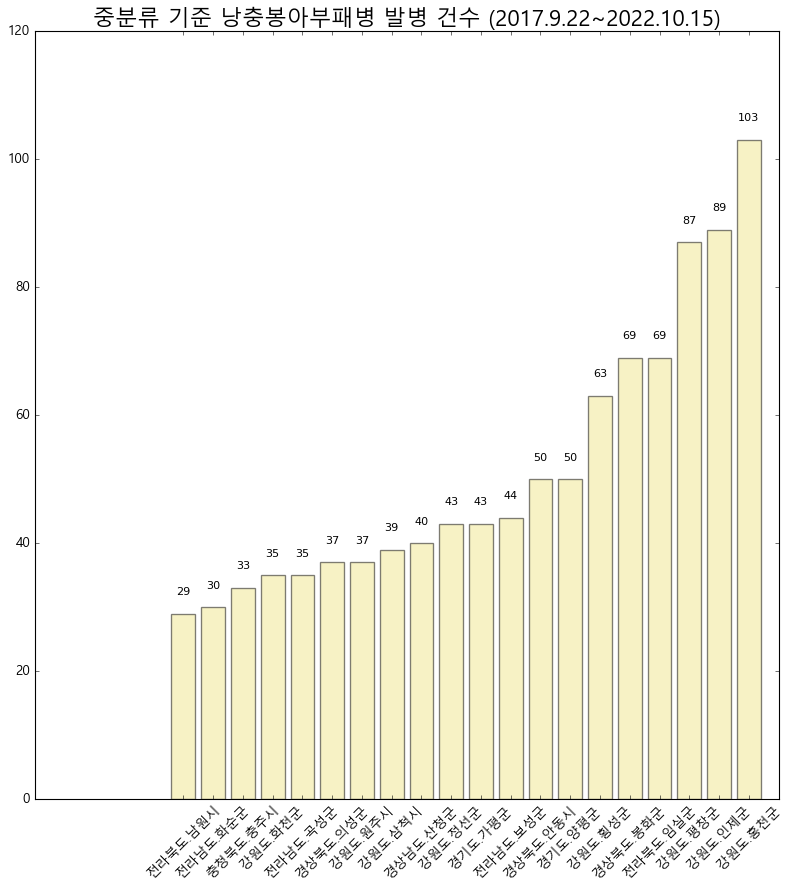

In [17]:
plt.rc('font', family='Malgun Gothic')
print(plt.rcParams['font.family'])
x=np.arange(len(virus.second_div.value_counts().iloc[:20]))
fig=plt.figure(figsize=(12, 12), facecolor='white')
ax = fig.add_subplot()
plt.style.use(['classic'])
bars=plt.bar(x, virus.second_div.value_counts(ascending=True).iloc[-20:].values, 
             color='khaki', 
             edgecolor='black', 
             linewidth=1.2, 
             alpha=0.5, 
             width=0.8)
for i, b in enumerate(bars):
    ax.text(b.get_x()+b.get_width()*(1/2),b.get_height()+3, \
            virus.second_div.value_counts(ascending=True).iloc[-20:].values[i],ha='center',fontsize=10)
plt.xticks(x, virus.second_div.value_counts(ascending=True).iloc[-20:].index, rotation=45)
ax.set_title('중분류 기준 낭충봉아부패병 발병 건수 (2017.9.22~2022.10.15)',fontsize= 20)

['Malgun Gothic']


Text(0.5, 1.0, '소분류 기준 낭충봉아부패병 발병 건수 (2017.9.22~2022.10.15)')

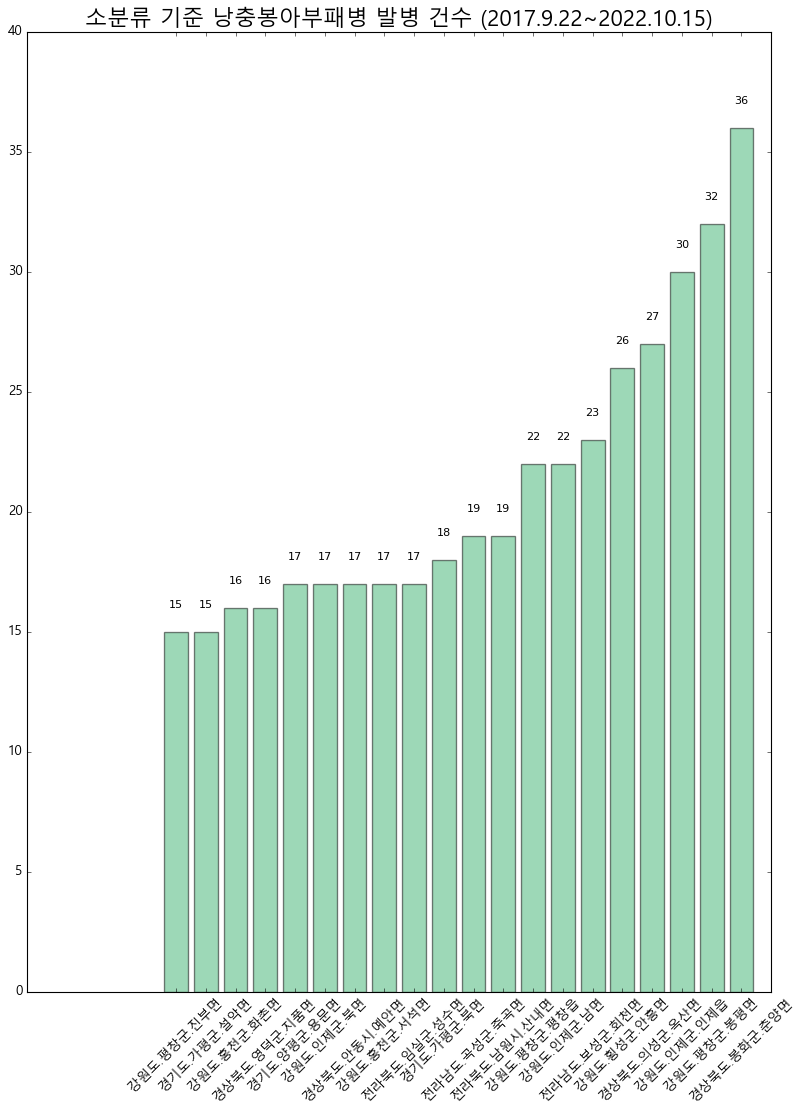

In [18]:
plt.rc('font', family='Malgun Gothic')
print(plt.rcParams['font.family'])
x=np.arange(len(virus.third_div.value_counts(ascending=True).iloc[-20:]))
fig=plt.figure(figsize=(12, 15), facecolor='white')
ax = fig.add_subplot()
plt.style.use(['classic'])
bars=plt.bar(x, virus.third_div.value_counts(ascending=True).iloc[-20:].values, 
             color='mediumseagreen', 
             edgecolor='black', 
             linewidth=1.2, 
             alpha=0.5, 
             width=0.8)
for i, b in enumerate(bars):
    ax.text(b.get_x()+b.get_width()*(1/2),b.get_height()+1, \
            virus.third_div.value_counts(ascending=True).iloc[-20:].values[i],ha='center',fontsize=10)
plt.xticks(x, virus.third_div.value_counts(ascending=True).iloc[-20:].index, rotation=45)
ax.set_title('소분류 기준 낭충봉아부패병 발병 건수 (2017.9.22~2022.10.15)',fontsize= 20)

In [19]:
virus.third_div[virus.second_div=='강원도.홍천군'].value_counts() #중분류에서 가장 발병횟수가 많은 홍천군은 소분류로 가도 발병횟수가 상당히 고르게 퍼져있다.

강원도.홍천군.서석면    17
강원도.홍천군.화촌면    16
강원도.홍천군.북방면    14
강원도.홍천군.서면     12
강원도.홍천군.남면     12
강원도.홍천군.내촌면    11
강원도.홍천군.두촌면     6
강원도.홍천군.동면      6
강원도.홍천군.홍천읍     6
강원도.홍천군.내면      3
Name: third_div, dtype: int64

([<matplotlib.patches.Wedge at 0x1c94d072df0>,
 [Text(0.9988393436141491, 0.5699297901044095, '강원도.홍천군.서석면'),
  Text(0.052595722495742514, 1.1487966268992744, '강원도.홍천군.화촌면'),
  Text(-0.8784408774989103, 0.7421870550871555, '강원도.홍천군.북방면'),
  Text(-1.145189033422559, -0.10508129104986, '강원도.홍천군.서면'),
  Text(-0.7815862568061922, -0.843577455348165, '강원도.홍천군.남면'),
  Text(-0.05259572249574265, -1.1487966268992744, '강원도.홍천군.내촌면'),
  Text(0.5236510932928462, -1.0238601137329295, '강원도.홍천군.두촌면'),
  Text(0.8553984415059949, -0.7686309298155487, '강원도.홍천군.동면'),
  Text(1.0738268476311739, -0.41157733332448665, '강원도.홍천군.홍천읍'),
  Text(1.145189029118249, -0.10508133795875688, '강원도.홍천군.내면')],
 [Text(0.5645613681297363, 0.3221342291894488, '16.5%'),
  Text(0.029728017062810985, 0.6493198325952421, '15.5%'),
  Text(-0.49651006119503627, 0.4194970311362184, '13.6%'),
  Text(-0.6472807580214462, -0.05939377320209478, '11.7%'),
  Text(-0.44176614515132595, -0.47680464867504974, '11.7%'),
  Text(-0.029728017

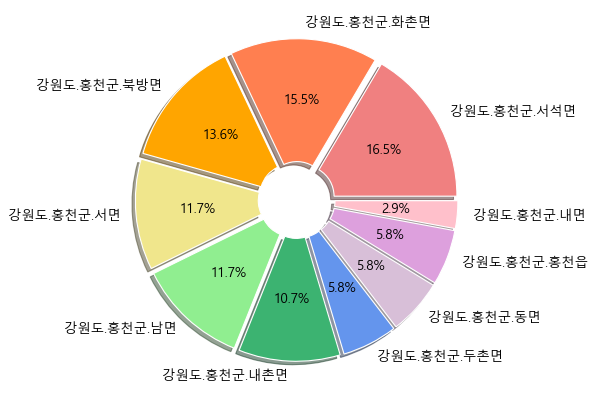

In [20]:
plt.rc('font', family='Malgun Gothic')
wedgeprops={'width': 0.8, 'edgecolor': 'white', 'linewidth': 1}
colors=['lightcoral', 'coral', 'orange', 'khaki',
       'lightgreen', 'mediumseagreen', 'cornflowerblue','thistle',
       'plum', 'pink']
explode=[0.05, 0.05, 0.05,0.05,0.05,0.05, 0.05,0.05,0.05,0.05]
fig=plt.figure(figsize=(10, 6), facecolor='white')
plt.pie(virus.third_div[virus.second_div=='강원도.홍천군'].value_counts().values, 
        labels=virus.third_div[virus.second_div=='강원도.홍천군'].value_counts().index,
        autopct='%.1f%%',
        wedgeprops=wedgeprops, 
        explode=explode,
        shadow=True,
        colors=colors)

In [21]:
virus.third_div[virus.second_div=='전라북도.남원시'].value_counts() #하지만 상위 20위인 전라북도 남원시만 봐도 특정 지역에만 값이 몰려있고
#대부분의 지역은 발생건수가 1에 불과해 바이러스 발생에 있어 어떠한 패턴이나 공통점을 파악하기가 어렵다. 
#이 안에서 공통점을 파악해서 새로운 분류를 만드는게 어렵다.

전라북도.남원시.산내면    19
전라북도.남원시.사매면     2
전라북도.남원시.도통동     2
전라북도.남원시.인월면     1
전라북도.남원시.운봉읍     1
전라북도.남원시.산곡동     1
전라북도.남원시.화정동     1
전라북도.남원시.고죽동     1
전라북도.남원시.동충동     1
Name: third_div, dtype: int64

([<matplotlib.patches.Wedge at 0x1c94cb40760>,
 [Text(-0.5386696871230159, 1.0160388615475258, '전라북도.남원시.산내면'),
  Text(-0.42565892089226587, -1.0683232109548273, '전라북도.남원시.사매면'),
  Text(0.06225969760464353, -1.1483134284916199, '전라북도.남원시.도통동'),
  Text(0.4256588333715814, -1.0683232458262548, '전라북도.남원시.인월면'),
  Text(0.6453650840649429, -0.9518423757481328, '전라북도.남원시.운봉읍'),
  Text(0.8348947809231546, -0.7908544144071511, '전라북도.남원시.산곡동'),
  Text(0.9853857260340239, -0.5928869798944821, '전라북도.남원시.화정동'),
  Text(1.0898011301150625, -0.36719680935423804, '전라북도.남원시.고죽동'),
  Text(1.1432586449570612, -0.12433692424595584, '전라북도.남원시.동충동')],
 [Text(-0.30446547533040025, 0.574282834787732, '65.5%'),
  Text(-0.24058982485215022, -0.6038348583657718, '6.9%'),
  Text(0.03519026386349417, -0.6490467204517851, '6.9%'),
  Text(0.24058977538393728, -0.6038348780757091, '3.4%'),
  Text(0.36477156925409804, -0.5379978645532923, '3.4%'),
  Text(0.4718970500870004, -0.4470046690127375, '3.4%'),
  Text(0.55695

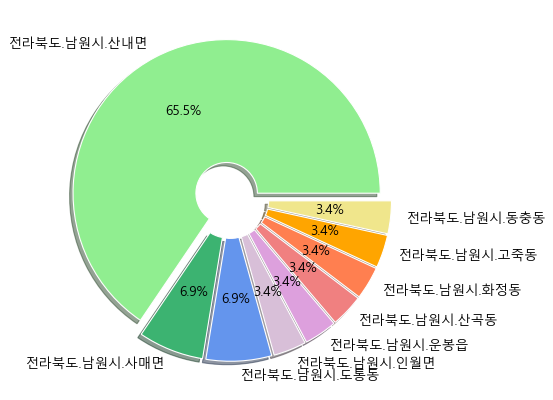

In [22]:
plt.rc('font', family='Malgun Gothic')
wedgeprops={'width': 0.8, 'edgecolor': 'white', 'linewidth': 1}
colors=['lightgreen', 'mediumseagreen', 'cornflowerblue','thistle',
       'plum','lightcoral', 'coral', 'orange', 'khaki']
explode=[0.05, 0.05, 0.05,0.05,0.05,0.05, 0.05,0.05,0.05]
fig=plt.figure(figsize=(10, 6), facecolor='white')
plt.pie(virus.third_div[virus.second_div=='전라북도.남원시'].value_counts().values, 
        labels=virus.third_div[virus.second_div=='전라북도.남원시'].value_counts().index,
        autopct='%.1f%%',
        wedgeprops=wedgeprops, 
        explode=explode,
        shadow=True,
       colors=colors)

In [23]:
print(virus.date[virus.third_div=='전라북도.남원시.인월면'])
print(virus.date[virus.third_div=='전라북도.남원시.운봉읍'])
print(virus.date[virus.third_div=='전라북도.남원시.산곡동'])
print(virus.date[virus.third_div=='전라북도.남원시.화정동'])
print(virus.date[virus.third_div=='전라북도.남원시.고축동'])
print(virus.date[virus.third_div=='전라북도.남원시.동충동']) #특별하게 이 지역들간에 관계를 파악하기 어렵고 대게 가장 발병이 많이 발생한 지역에서
#전파되어 발생했을 가능성이 높다. 즉, 소분류로 나눠도 결국은 산내면을 중심으로 하나로 묶인다. 

353    2020-06-12
Name: date, dtype: object
490    2019-10-21
Name: date, dtype: object
610    2019-08-09
Name: date, dtype: object
630    2019-07-26
Name: date, dtype: object
Series([], Name: date, dtype: object)
770    2019-06-03
Name: date, dtype: object


In [24]:
print("대분류 : ",len(virus.first_div.value_counts()))
print("중분류 : ",len(virus.second_div.value_counts()))
print('소분류 : ',len(virus.third_div.value_counts()))#따라서 중분류를 기준으로 발병의 패턴과 공통점을 파악해 지역을 분류한다.

대분류 :  16
중분류 :  145
소분류 :  530


In [25]:
gwon=virus[virus['first_div']=="강원도"].iloc[:, [1, 3, 6, 7]] #첫번째 분류기준이 강원도인 애들만 가져온다.
ggi=virus[virus['first_div']=='경기도'].iloc[:, [1, 3, 6, 7]] #첫번째 분류기준이 경기도인 애들만 가져온다.
gsangnam=virus[virus['first_div']=='경상남도'].iloc[:, [1, 3, 6, 7]]
gsangbuk=virus[virus['first_div']=='경상북도'].iloc[:, [1, 3, 6, 7]]
jnam=virus[virus['first_div']=='전라남도'].iloc[:, [1, 3, 6, 7]]
jbuk=virus[virus['first_div']=='전라북도'].iloc[:, [1, 3, 6, 7]]
ccnam=virus[virus['first_div']=='충청남도'].iloc[:, [1, 3, 6, 7]]
ccbuk=virus[virus['first_div']=='충청북도'].iloc[:, [1, 3, 6, 7]]
jeju=virus[virus['first_div']=='제주특별자치도'].iloc[:, [1, 3, 6, 7]]

df=pd.DataFrame(dates) #아까 계산한 2017년 9월 22일부터 2022년 10월 15일까지의 날짜

In [26]:
#강원도
df_gwon=pd.DataFrame(np.zeros((len(dates), len(gwon.groupby(gwon.second_div).count().index))), columns=gwon.groupby(gwon.second_div).count().index)
df_gwon=pd.concat([df, df_gwon], axis=1) #총 날짜만큼의 0리스트를 강원도의 두번째 분류기준 개수만큼 열로 생성한다.  
#그리고 아까 만든 4열짜리 강원도 데이터프레임과 cbind 한다.

#경기도
df_ggi=pd.DataFrame(np.zeros((len(dates), len(ggi.groupby(ggi.second_div).count().index))), columns=ggi.groupby(ggi.second_div).count().index)
df_ggi=pd.concat([df, df_ggi], axis=1)

#경상남도
df_gsangnam=pd.DataFrame(np.zeros((len(dates), len(gsangnam.groupby(gsangnam.second_div).count().index))), columns=gsangnam.groupby(gsangnam.second_div).count().index)
df_gsangnam=pd.concat([df, df_gsangnam], axis=1)

#경상북도
df_gsangbuk=pd.DataFrame(np.zeros((len(dates), len(gsangbuk.groupby(gsangbuk.second_div).count().index))), columns=gsangbuk.groupby(gsangbuk.second_div).count().index)
df_gsangbuk=pd.concat([df, df_gsangbuk], axis=1)

#전라남도
df_jnam=pd.DataFrame(np.zeros((len(dates), len(jnam.groupby(jnam.second_div).count().index))), columns=jnam.groupby(jnam.second_div).count().index)
df_jnam=pd.concat([df, df_jnam], axis=1)

#전라북도
df_jbuk=pd.DataFrame(np.zeros((len(dates), len(jbuk.groupby(jbuk.second_div).count().index))), columns=jbuk.groupby(jbuk.second_div).count().index)
df_jbuk=pd.concat([df, df_jbuk], axis=1)

#충청남도
df_ccnam=pd.DataFrame(np.zeros((len(dates), len(ccnam.groupby(ccnam.second_div).count().index))), columns=ccnam.groupby(ccnam.second_div).count().index)
df_ccnam=pd.concat([df, df_ccnam], axis=1)

#충청북도
df_ccbuk=pd.DataFrame(np.zeros((len(dates), len(ccbuk.groupby(ccbuk.second_div).count().index))), columns=ccbuk.groupby(ccbuk.second_div).count().index)
df_ccbuk=pd.concat([df, df_ccbuk], axis=1)

#제주도
df_jeju=pd.DataFrame(np.zeros((len(dates), len(jeju.groupby(jeju.second_div).count().index))), columns=jeju.groupby(jeju.second_div).count().index)
df_jeju=pd.concat([df, df_jeju], axis=1)

# 각 지역별, 날짜별 감염개체수 계산 및 지역별 dtw 계산 후 지역묶기

In [27]:
def reform(df, old_df, dates): #dates는 date_gen으로 함수 돌리고 입력
    for i in range(0, len(dates)):
        for j in old_df.index:
            day=dates[i]
            occur=old_df.date[j]
            if day==occur:
                col=old_df.second_div[j]
                df[col][i]=df[col][i]+old_df.num[j]
    return df
#방금 만든 두번째 지역분류이름들이 열이름으로 들어가있는 영행렬에 날짜별로, 지역별로 총 감염개체수를 합산한다. 

## 강원도

In [28]:
df_gwon=reform(df_gwon, gwon, dates)
df_gwon.to_csv("C:/Users/localadmin/Desktop/data/eda data/df_gwon.csv", encoding='utf-8-sig')

C:\Users\localadmin\AppData\Local\Temp\ipykernel_5576\625444845.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i]=df[col][i]+old_df.num[j]


감염개체수가 가장 많은 지역은 여러 지역에 영향을 끼친, 가장 영향력 있는 지역일 것이다. 또는 양봉산업이 발전한 곳이다. 따라서 이 지역에서부터 다른 지역으로 역병이 펴져나갔다고 가정한다. <br>
예를 들어 강원도에서 가장 감염개체수가 많은 지역은 강원도 삼척시이다. <br>
여기서부터 다른 모든 지역간의 동적시간와핑을 계산한다.
 

손실이 비교적 적게 나온 지역들을 보면 실제로 삼척시와 지리적으로 유사한 지역이라는 것을 확인할 수 있다. 그렇다면 이 손실들이 정규분포를 따른다고 가정하고 95%신뢰구간을 구해 그 이하의 값일 경우 삼척시와 같은 지역분류로 본다.
 
표준정규분포표 참고


In [45]:
def dtw_function(df, z=1.645):
    from dtaidistance import dtw #dtw계산을 위해 함수 불러오기


    locs=[]
    box=[]
    left=df.columns[1:]

    while True:
    
        key=df[left].sum().sort_values(ascending=False).index[0]
        print("남은 지역들 중 감염개체 발생건수가 가장 많은 지역: ", key)
        loss=[]
        loc=[]
        for i in left:
            if i==key:
                print("자기자신 계산")
            else:
                distance=dtw.distance(df[i], df[key])
                loss.append(distance)
                loc.append(i)
                print(i, "와 ", key, "의 동적시간와핑 손실: ", round(distance, 3))

        lowerCI=np.mean(loss)-z*np.std(loss)/len(loss)**(1/2)
        box=[]
        for idx in np.where(np.array(loss)<lowerCI)[0]:
            box.append(loc[idx])
            
        print(key, "과 같은 범주로 묶인 지역들: ", box)
        box.append(key)
        locs.append(box)
        left=list(set(left)-set(box))
        if len(left)<=3:
            print("남은 지역들: ", left)
            for i in range(0, len(left)):
                locs.append(left[i])
            break 
    return locs

In [28]:
division=dtw_function(df_gwon)

numpy.ndarray size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject


남은 지역들 중 감염개체 발생건수가 가장 많은 지역:  강원도.삼척시
강원도.강릉시 와  강원도.삼척시 의 동적시간와핑 손실:  473.722
강원도.고성군 와  강원도.삼척시 의 동적시간와핑 손실:  599.908
강원도.동해시 와  강원도.삼척시 의 동적시간와핑 손실:  488.671
자기자신 계산
강원도.양구군 와  강원도.삼척시 의 동적시간와핑 손실:  576.01
강원도.양양군 와  강원도.삼척시 의 동적시간와핑 손실:  608.589
강원도.영월군 와  강원도.삼척시 의 동적시간와핑 손실:  528.848
강원도.원주시 와  강원도.삼척시 의 동적시간와핑 손실:  438.577
강원도.인제군 와  강원도.삼척시 의 동적시간와핑 손실:  551.631
강원도.정선군 와  강원도.삼척시 의 동적시간와핑 손실:  406.521
강원도.철원군 와  강원도.삼척시 의 동적시간와핑 손실:  618.036
강원도.춘천시 와  강원도.삼척시 의 동적시간와핑 손실:  586.433
강원도.태백시 와  강원도.삼척시 의 동적시간와핑 손실:  404.375
강원도.평창군 와  강원도.삼척시 의 동적시간와핑 손실:  548.783
강원도.홍천군 와  강원도.삼척시 의 동적시간와핑 손실:  549.82
강원도.화천군 와  강원도.삼척시 의 동적시간와핑 손실:  513.086
강원도.횡성군 와  강원도.삼척시 의 동적시간와핑 손실:  496.791
강원도.강릉시
강원도.동해시
강원도.원주시
강원도.정선군
강원도.태백시
강원도.횡성군
강원도.삼척시 과 같은 범주로 묶인 지역들:  ['강원도.강릉시', '강원도.동해시', '강원도.원주시', '강원도.정선군', '강원도.태백시', '강원도.횡성군']
남은 지역들 중 감염개체 발생건수가 가장 많은 지역:  강원도.홍천군
강원도.영월군 와  강원도.홍천군 의 동적시간와핑 손실:  178.511
강원도.평창군 와  강원도.홍천군 의 동적시간와핑 손실:  93.664
자기자신 계산
강원도.춘천시 와  강원도.홍천군 의 동적시간와핑 손실

In [46]:
gwon.second_div.value_counts() #나머지 하위 3개가 애초에 데이터가 별로 없는 애들이라면 그냥 다른 곳에 포함시키자.

강원도.홍천군    103
강원도.인제군     89
강원도.평창군     87
강원도.횡성군     63
강원도.정선군     43
강원도.삼척시     39
강원도.원주시     37
강원도.화천군     35
강원도.춘천시     20
강원도.양양군     15
강원도.강릉시      9
강원도.영월군      7
강원도.양구군      5
강원도.태백시      5
강원도.고성군      4
강원도.동해시      3
강원도.철원군      1
Name: second_div, dtype: int64

## 정성평가
실제 지리적으로 인접해있으면서 비슷한 시기에 발생이 이루어졌는지 한번 더 확인한다.

In [47]:
def compare(df, col1, col2, gap=7):
    #col1 예시 : '강원도.원주시'
    #col2 예시: '강원도.삼척시'
    date1=df.iloc[np.where(np.array(df[col1])!=0)[0], 0]
    date2=df.iloc[np.where(np.array(df[col2])!=0)[0], 0]
    if len(date1)<=len(date2):
        mindays=[]
        relations=[]
        for occur in date1:
            diff_occur=[]
            for base in date2:
                diff_occur.append(abs(occur-base))
            mindays.append(np.min(diff_occur))
            if np.min(diff_occur).days <= gap:
                relations.append(np.min(diff_occur).days)
        return print(col1, "과 ", col2,"의 평균 시간차: ",np.mean(mindays) ,"\n", gap,"일이내 연속 발생건수: ", len(relations))
    else:
        print("length of col1 is larger than col2. change the positions")

In [48]:
compare(df_gwon, '강원도.평창군', '강원도.홍천군')
compare(df_gwon, '강원도.삼척시', '강원도.평창군') 
#평창군은 화천군, 양구군과 지리적으로 너무 떨어져있어서 결과를 신뢰하기 힘들다.
#따라서 지리적으로 가까운 삼척시, 홍천군과 유사도를 비교해보자.
#결과적으로 평창군은 홍천군으로 간다.
print('_________횡성군어디____________')
compare(df_gwon, '강원도.횡성군', '강원도.평창군') 

compare(df_gwon, '강원도.횡성군', '강원도.홍천군')
compare(df_gwon,'강원도.삼척시', '강원도.횡성군')
#평창군, 횡성군, 홍천군 같이 묶인다.

print('_________원주시어디_____________')
compare(df_gwon, '강원도.원주시', '강원도.삼척시')
compare(df_gwon, '강원도.원주시', '강원도.평창군')
#역시나 원주시도 홍천군으로 묶는다. 평균시간차가 큰 것은 원주시가 평창군에는 없는 연도를 많이 가지고 있기 때문이다. 

print("_________춘천시 어디_____________")
compare(df_gwon, '강원도.춘천시', '강원도.화천군')
compare(df_gwon, '강원도.춘천시', '강원도.홍천군')
#7일이내 발생건수는 크게 차이나지 않는다. 근데 평균 시간차 차이가 크다. 화천시에는 없는 발생연도가 춘천시에 좀 있다는건데 발생건수가 크게 차이나지 않으니
#최소한 연도라도 맞출 수 있는 화천군으로 간다.

print("__________고성군과 양양군______")
compare(df_gwon, '강원도.고성군', '강원도.양양군') #감염개체수가 너무 적어 비교 불가능하다. 과감히 삭제한다.

강원도.평창군 과  강원도.홍천군 의 평균 시간차:  11 days, 7:31:20.597015 
 7 일이내 연속 발생건수:  54
강원도.삼척시 과  강원도.평창군 의 평균 시간차:  35 days, 3:18:37.241379 
 7 일이내 연속 발생건수:  22
_________횡성군어디____________
강원도.횡성군 과  강원도.평창군 의 평균 시간차:  3 days, 0:53:20 
 7 일이내 연속 발생건수:  51
강원도.횡성군 과  강원도.홍천군 의 평균 시간차:  7 days, 21:20:00 
 7 일이내 연속 발생건수:  53
강원도.삼척시 과  강원도.횡성군 의 평균 시간차:  39 days, 3:18:37.241379 
 7 일이내 연속 발생건수:  17
_________원주시어디_____________
강원도.원주시 과  강원도.삼척시 의 평균 시간차:  33 days, 4:08:16.551724 
 7 일이내 연속 발생건수:  5
강원도.원주시 과  강원도.평창군 의 평균 시간차:  88 days, 7:26:53.793103 
 7 일이내 연속 발생건수:  14
_________춘천시 어디_____________
강원도.춘천시 과  강원도.화천군 의 평균 시간차:  24 days, 22:40:00 
 7 일이내 연속 발생건수:  7
강원도.춘천시 과  강원도.홍천군 의 평균 시간차:  102 days, 20:00:00 
 7 일이내 연속 발생건수:  10
__________고성군과 양양군______
강원도.고성군 과  강원도.양양군 의 평균 시간차:  267 days, 6:00:00 
 7 일이내 연속 발생건수:  1


In [619]:
print("강원도 춘천시 발생일자: ","\n",df_gwon.iloc[np.where(np.array(df_gwon['강원도.춘천시'])!= 0)[0], 0])
print("강원도 홍천군 발생일자: ","\n",df_gwon.iloc[np.where(np.array(df_gwon['강원도.홍천군'])!= 0)[0], 0])

강원도 춘천시 발생일자:  
 301     2018-07-20
355     2018-09-12
371     2018-09-28
418     2018-11-14
552     2019-03-28
588     2019-05-03
613     2019-05-28
650     2019-07-04
690     2019-08-13
796     2019-11-27
935     2020-04-14
972     2020-05-21
1034    2020-07-22
1299    2021-04-13
1302    2021-04-16
1307    2021-04-21
1376    2021-06-29
1379    2021-07-02
Name: 0, dtype: object
강원도 홍천군 발생일자:  
 199    2018-04-09
201    2018-04-11
203    2018-04-13
208    2018-04-18
210    2018-04-20
          ...    
699    2019-08-22
713    2019-09-05
731    2019-09-23
929    2020-04-08
992    2020-06-10
Name: 0, Length: 74, dtype: object


## 경기도 

In [49]:
df_ggi=reform(df_ggi, ggi, dates)
df_ggi.to_csv("C:/Users/localadmin/Desktop/data/eda data/df_ggi.csv", encoding='utf-8-sig')

C:\Users\localadmin\AppData\Local\Temp\ipykernel_8916\625444845.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i]=df[col][i]+old_df.num[j]


In [518]:
division_ggi=dtw_function(df_ggi)

남은 지역들 중 감염개체 발생건수가 가장 많은 지역:  경기도.양평군
경기도.가평군 와  경기도.양평군 의 동적시간와핑 손실:  53.132
경기도.고양시 와  경기도.양평군 의 동적시간와핑 손실:  61.457
경기도.군포시 와  경기도.양평군 의 동적시간와핑 손실:  77.627
경기도.김포시 와  경기도.양평군 의 동적시간와핑 손실:  60.075
경기도.남양주시 와  경기도.양평군 의 동적시간와핑 손실:  62.968
경기도.동두천시 와  경기도.양평군 의 동적시간와핑 손실:  76.368
경기도.부천시 와  경기도.양평군 의 동적시간와핑 손실:  74.766
경기도.성남시 와  경기도.양평군 의 동적시간와핑 손실:  64.521
경기도.수원시 와  경기도.양평군 의 동적시간와핑 손실:  77.531
경기도.시흥시 와  경기도.양평군 의 동적시간와핑 손실:  74.209
경기도.안산시 와  경기도.양평군 의 동적시간와핑 손실:  77.434
경기도.안성시 와  경기도.양평군 의 동적시간와핑 손실:  71.903
경기도.안양시 와  경기도.양평군 의 동적시간와핑 손실:  77.627
경기도.양주시 와  경기도.양평군 의 동적시간와핑 손실:  77.318
자기자신 계산
경기도.여주시 와  경기도.양평군 의 동적시간와핑 손실:  67.602
경기도.연천군 와  경기도.양평군 의 동적시간와핑 손실:  66.053
경기도.오산시 와  경기도.양평군 의 동적시간와핑 손실:  76.824
경기도.용인시 와  경기도.양평군 의 동적시간와핑 손실:  232.271
경기도.이천시 와  경기도.양평군 의 동적시간와핑 손실:  58.686
경기도.파주시 와  경기도.양평군 의 동적시간와핑 손실:  73.986
경기도.평택시 와  경기도.양평군 의 동적시간와핑 손실:  78.441
경기도.포천시 와  경기도.양평군 의 동적시간와핑 손실:  77.24
경기도.화성시 와  경기도.양평군 의 동적시간와핑 손실:  77.298
경기도.가평군
경기도.고양시
경기도.김포시
경기도.남양주

/anaconda/envs/azureml_py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/anaconda/envs/azureml_py38/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/anaconda/envs/azureml_py38/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/anaconda/envs/azureml_py38/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/anaconda/envs/azureml_py38/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


IndexError: index 0 is out of bounds for axis 0 with size 0

경기도.군포시 와  경기도.안양시 의 동적시간와핑 손실:  0.0
자기자신 계산
경기도.안양시 과 같은 범주로 묶인 지역들:  []
남은 지역들 중 감염개체 발생건수가 가장 많은 지역:  경기도.군포시
자기자신 계산
경기도.군포시 과 같은 범주로 묶인 지역들:  []


In [531]:
ggi.second_div.value_counts()

경기도.양평군     50
경기도.가평군     43
경기도.이천시     12
경기도.남양주시     9
경기도.안성시      8
경기도.고양시      7
경기도.김포시      5
경기도.용인시      5
경기도.연천군      5
경기도.시흥시      4
경기도.파주시      4
경기도.양주시      4
경기도.성남시      4
경기도.동두천시     3
경기도.오산시      2
경기도.여주시      2
경기도.안산시      2
경기도.포천시      2
경기도.수원시      1
경기도.부천시      1
경기도.화성시      1
경기도.군포시      1
경기도.평택시      1
경기도.안양시      1
Name: second_div, dtype: int64

## 정성평가
경기도는 강원도와 다르게 지리적으로 상당히 거리가 먼 지역들이 한 분류로 많이 나온다. <br> 
또한 발생건수가 5년동안 1번밖에 없는 지역도 여섯군데나 있다. 따라서 같은 분류로 나온 지역들이라도 직접 확인해보도록 하자.

In [50]:
print("_______고양중심 경기 북서지역_____")
compare(df_ggi, '경기도.고양시','경기도.안성시', 10)
compare(df_ggi, '경기도.김포시', '경기도.고양시', 10)
compare(df_ggi, '경기도.연천군', '경기도.고양시', 10)
compare(df_ggi, '경기도.김포시', '경기도.연천군', 10)
#애초에 데이터가 적어서 분류가 어려우나, 발생날짜차이 허용치를 늘려도 고양시와 연천군의 연관성이 보인다. 
#반면, 고양시와 김포시, 연천군과 김포시의 관련은 거의 없다. 따라서 고양시와 연천군을 하나로 묶는다. 

print("___________파주시____________")
compare(df_ggi, '경기도.파주시', '경기도.고양시', 10)
compare(df_ggi, '경기도.파주시', '경기도.연천군', 10)
#파주시의 연속 발생건수가 한 건 있으며 평균시간차가 비교적 적다. 고양시와 연천군, 파주시를 하나로 묶는다.

print("__________이천시______")
compare(df_ggi, '경기도.용인시','경기도.이천시', 10)
compare(df_ggi, '경기도.안성시','경기도.이천시', 10)
compare(df_ggi, '경기도.여주시', '경기도.이천시', 10)
compare(df_ggi, '경기도.용인시', '경기도.안성시', 10)
#제일 발생건수가 많은 이천시를 중심으로 안성시, 여주시가 묶인다. 
compare(df_ggi, '경기도.성남시', '경기도.용인시', 10)
compare(df_ggi, '경기도.성남시', '경기도.이천시', 10)
#성남시도 이천시 중심으로 묶인다.


_______고양중심 경기 북서지역_____
경기도.고양시 과  경기도.안성시 의 평균 시간차:  236 days, 20:34:17.142857 
 10 일이내 연속 발생건수:  1
경기도.김포시 과  경기도.고양시 의 평균 시간차:  757 days, 9:36:00 
 10 일이내 연속 발생건수:  0
경기도.연천군 과  경기도.고양시 의 평균 시간차:  88 days, 9:36:00 
 10 일이내 연속 발생건수:  2
경기도.김포시 과  경기도.연천군 의 평균 시간차:  391 days, 14:24:00 
 10 일이내 연속 발생건수:  0
___________파주시____________
경기도.파주시 과  경기도.고양시 의 평균 시간차:  83 days, 12:00:00 
 10 일이내 연속 발생건수:  0
경기도.파주시 과  경기도.연천군 의 평균 시간차:  86 days, 18:00:00 
 10 일이내 연속 발생건수:  1
__________이천시______
경기도.용인시 과  경기도.이천시 의 평균 시간차:  73 days, 19:12:00 
 10 일이내 연속 발생건수:  1
경기도.안성시 과  경기도.이천시 의 평균 시간차:  18 days, 6:00:00 
 10 일이내 연속 발생건수:  4
경기도.여주시 과  경기도.이천시 의 평균 시간차:  22 days, 12:00:00 
 10 일이내 연속 발생건수:  1
경기도.용인시 과  경기도.안성시 의 평균 시간차:  155 days, 4:48:00 
 10 일이내 연속 발생건수:  1
경기도.성남시 과  경기도.용인시 의 평균 시간차:  125 days, 0:00:00 
 10 일이내 연속 발생건수:  0
경기도.성남시 과  경기도.이천시 의 평균 시간차:  17 days, 0:00:00 
 10 일이내 연속 발생건수:  2


## 경상남도

In [51]:
df_gsangnam=reform(df_gsangnam, gsangnam, dates)
df_gsangnam.to_csv("C:/Users/localadmin/Desktop/data/eda data/df_gsangnam.csv", encoding='utf-8-sig')

C:\Users\localadmin\AppData\Local\Temp\ipykernel_8916\625444845.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i]=df[col][i]+old_df.num[j]


In [522]:
division_gsangnam=dtw_function(df_gsangnam)

남은 지역들 중 감염개체 발생건수가 가장 많은 지역:  경상남도.거창군
경상남도.거제시 와  경상남도.거창군 의 동적시간와핑 손실:  585.945
자기자신 계산
경상남도.고성군 와  경상남도.거창군 의 동적시간와핑 손실:  548.094
경상남도.김해시 와  경상남도.거창군 의 동적시간와핑 손실:  585.548
경상남도.남해군 와  경상남도.거창군 의 동적시간와핑 손실:  589.099
경상남도.밀양시 와  경상남도.거창군 의 동적시간와핑 손실:  585.109
경상남도.사천시 와  경상남도.거창군 의 동적시간와핑 손실:  589.539
경상남도.산청군 와  경상남도.거창군 의 동적시간와핑 손실:  490.06
경상남도.양산시 와  경상남도.거창군 의 동적시간와핑 손실:  592.408
경상남도.의령군 와  경상남도.거창군 의 동적시간와핑 손실:  336.528
경상남도.진주시 와  경상남도.거창군 의 동적시간와핑 손실:  465.254
경상남도.창원시 와  경상남도.거창군 의 동적시간와핑 손실:  570.697
경상남도.통영시 와  경상남도.거창군 의 동적시간와핑 손실:  566.936
경상남도.하동군 와  경상남도.거창군 의 동적시간와핑 손실:  520.555
경상남도.함안군 와  경상남도.거창군 의 동적시간와핑 손실:  565.947
경상남도.함양군 와  경상남도.거창군 의 동적시간와핑 손실:  468.357
경상남도.합천군 와  경상남도.거창군 의 동적시간와핑 손실:  580.245
경상남도.산청군
경상남도.의령군
경상남도.진주시
경상남도.함양군
경상남도.거창군 과 같은 범주로 묶인 지역들:  ['경상남도.산청군', '경상남도.의령군', '경상남도.진주시', '경상남도.함양군']
남은 지역들 중 감염개체 발생건수가 가장 많은 지역:  경상남도.하동군
경상남도.통영시 와  경상남도.하동군 의 동적시간와핑 손실:  67.342
경상남도.남해군 와  경상남도.하동군 의 동적시간와핑 손실:  83.427
경상남도.김해시 와  경상남도.하동군 의 동적시간와핑

In [555]:
gsangnam.second_div.value_counts()

경상남도.산청군    40
경상남도.창원시    18
경상남도.합천군    17
경상남도.함양군    13
경상남도.함안군    11
경상남도.김해시     9
경상남도.하동군     9
경상남도.거창군     8
경상남도.진주시     8
경상남도.의령군     6
경상남도.고성군     5
경상남도.사천시     5
경상남도.남해군     2
경상남도.통영시     2
경상남도.양산시     1
경상남도.밀양시     1
경상남도.거제시     1
Name: second_div, dtype: int64

## 정성평가

In [644]:
print("_______진주시, 합천군, 하동군_________")
compare(df_gsangnam, '경상남도.진주시', '경상남도.산청군')
compare(df_gsangnam, '경상남도.진주시', '경상남도.창원시')

compare(df_gsangnam, '경상남도.합천군', '경상남도.산청군')

compare(df_gsangnam, '경상남도.하동군', '경상남도.산청군')
compare(df_gsangnam, '경상남도.하동군', '경상남도.창원시')
#산청군이 혼자서 발생건수가 40이라 그런지 모두 다 산청군과 유사하게 나온다. 

print("----------창원시, 함안군, 고성군, 김해시, 사천시-------")
compare(df_gsangnam, '경상남도.함안군', '경상남도.창원시')
compare(df_gsangnam, '경상남도.고성군', '경상남도.창원시')
compare(df_gsangnam, '경상남도.김해시', '경상남도.창원시')
compare(df_gsangnam, '경상남도.사천시', '경상남도.창원시')
#함안군과 창안시의 연속발생건수는 2로 크지 않고 시간차도 큰 편이다. 하지만 창원시와 많이 유사한 김해시롸 함안군을 연결해보면
#둘이 상당히 닮았다. 즉 바이러스의 전이가 일어났다고 판단하고 같은 지역으로 묶었다. 

print("=-------고성군-------")
compare(df_gsangnam, '경상남도.고성군', '경상남도.김해시')
print("-------함안군-------")
compare(df_gsangnam, '경상남도.김해시', '경상남도.함안군')

compare(df_gsangnam, '경상남도.사천시', '경상남도.고성군')




_______진주시, 합천군, 하동군_________
경상남도.진주시 과  경상남도.산청군 의 평균 시간차:  108 days, 15:00:00 
 7 일이내 연속 발생건수:  4
경상남도.진주시 과  경상남도.창원시 의 평균 시간차:  102 days, 3:00:00 
 7 일이내 연속 발생건수:  0
경상남도.합천군 과  경상남도.산청군 의 평균 시간차:  94 days, 6:51:25.714286 
 7 일이내 연속 발생건수:  6
경상남도.하동군 과  경상남도.산청군 의 평균 시간차:  16 days, 20:34:17.142857 
 7 일이내 연속 발생건수:  2
경상남도.하동군 과  경상남도.창원시 의 평균 시간차:  75 days, 3:25:42.857143 
 7 일이내 연속 발생건수:  2
----------창원시, 함안군, 고성군, 김해시, 사천시-------
경상남도.함안군 과  경상남도.창원시 의 평균 시간차:  73 days, 14:24:00 
 7 일이내 연속 발생건수:  2
경상남도.고성군 과  경상남도.창원시 의 평균 시간차:  31 days, 14:24:00 
 7 일이내 연속 발생건수:  1
경상남도.김해시 과  경상남도.창원시 의 평균 시간차:  30 days, 21:20:00 
 7 일이내 연속 발생건수:  5
경상남도.사천시 과  경상남도.창원시 의 평균 시간차:  108 days, 4:48:00 
 7 일이내 연속 발생건수:  0
=-------고성군-------
경상남도.고성군 과  경상남도.김해시 의 평균 시간차:  29 days, 4:48:00 
 7 일이내 연속 발생건수:  1
-------함안군-------
경상남도.김해시 과  경상남도.함안군 의 평균 시간차:  37 days, 18:40:00 
 7 일이내 연속 발생건수:  3
경상남도.사천시 과  경상남도.고성군 의 평균 시간차:  238 days, 9:36:00 
 7 일이내 연속 발생건수:  1


# 경상북도

In [53]:
df_gsangbuk=reform(df_gsangbuk, gsangbuk, dates)
df_gsangbuk.to_csv("C:/Users/localadmin/Desktop/data/eda data/df_gsangbuk.csv", encoding='utf-8-sig')

C:\Users\localadmin\AppData\Local\Temp\ipykernel_8916\625444845.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i]=df[col][i]+old_df.num[j]


In [56]:
division_gsangbuk=dtw_function(df_gsangbuk)

남은 지역들 중 감염개체 발생건수가 가장 많은 지역:  경상북도.영덕군
경상북도.경주시 와  경상북도.영덕군 의 동적시간와핑 손실:  884.385
경상북도.구미시 와  경상북도.영덕군 의 동적시간와핑 손실:  691.422
경상북도.군위군 와  경상북도.영덕군 의 동적시간와핑 손실:  914.028
경상북도.김천시 와  경상북도.영덕군 의 동적시간와핑 손실:  679.244
경상북도.문경시 와  경상북도.영덕군 의 동적시간와핑 손실:  668.874
경상북도.봉화군 와  경상북도.영덕군 의 동적시간와핑 손실:  636.905
경상북도.상주시 와  경상북도.영덕군 의 동적시간와핑 손실:  578.55
경상북도.안동시 와  경상북도.영덕군 의 동적시간와핑 손실:  687.351
자기자신 계산
경상북도.영양군 와  경상북도.영덕군 의 동적시간와핑 손실:  772.945
경상북도.영주시 와  경상북도.영덕군 의 동적시간와핑 손실:  619.774
경상북도.영천시 와  경상북도.영덕군 의 동적시간와핑 손실:  696.017
경상북도.예천군 와  경상북도.영덕군 의 동적시간와핑 손실:  851.509
경상북도.의성군 와  경상북도.영덕군 의 동적시간와핑 손실:  728.541
경상북도.청도군 와  경상북도.영덕군 의 동적시간와핑 손실:  952.683
경상북도.청송군 와  경상북도.영덕군 의 동적시간와핑 손실:  831.019
경상북도.칠곡군 와  경상북도.영덕군 의 동적시간와핑 손실:  910.973
경상북도.포항시 와  경상북도.영덕군 의 동적시간와핑 손실:  850.179
경상북도.영덕군 과 같은 범주로 묶인 지역들:  ['경상북도.구미시', '경상북도.김천시', '경상북도.문경시', '경상북도.봉화군', '경상북도.상주시', '경상북도.안동시', '경상북도.영주시', '경상북도.영천시']
남은 지역들 중 감염개체 발생건수가 가장 많은 지역:  경상북도.의성군
경상북도.영양군 와  경상북도.의성군 의 동적시간와핑 손실:  255.319
경상북도.군위군 와  경상북

In [645]:
gsangbuk.second_div.value_counts()

경상북도.봉화군    69
경상북도.안동시    50
경상북도.의성군    37
경상북도.영덕군    24
경상북도.문경시    21
경상북도.영주시    19
경상북도.청송군    17
경상북도.경주시    15
경상북도.포항시    12
경상북도.상주시    11
경상북도.김천시    11
경상북도.칠곡군    11
경상북도.영천시    11
경상북도.영양군    11
경상북도.예천군     7
경상북도.구미시     6
경상북도.군위군     4
경상북도.청도군     2
Name: second_div, dtype: int64

## 정성평가

In [662]:
print("-------청송군------")
compare(df_gsangbuk, '경상북도.청송군', '경상북도.봉화군')
compare(df_gsangbuk, '경상북도.청송군', '경상북도.영덕군')#청송군은 봉화군 소속으로 봐야한다.
compare(df_gsangbuk, '경상북도.청송군', '경상북도.의성군')
print("------봉화군----")
compare(df_gsangbuk, '경상북도.영덕군', '경상북도.봉화군')
compare(df_gsangbuk, '경상북도.의성군', '경상북도.봉화군')#발생선수는 의성군이 더 많은데 평균시간차는 영덕군이 더 빠르다.
compare(df_gsangbuk, '경상북도.영덕군', '경상북도.봉화군', 5)#기준이 모호하니 발생건수기준을 좁혀서 다시 구해본다. 
compare(df_gsangbuk, '경상북도.의성군', '경상북도.봉화군', 5)#의성군보다 봉화군과의 교류가 빠르다. 봉화군은 영덕군 쪽이라고 볼 수 있다.
print("-----영천시------") #빼박 의성군이다
compare(df_gsangbuk, '경상북도.영천시', '경상북도.봉화군')
compare(df_gsangbuk, '경상북도.영천시', '경상북도.영덕군')#영천시는 영덕군보다 봉화군의 영향을 받는 쪽이다.
compare(df_gsangbuk, '경상북도.영천시', '경상북도.의성군')#봉화군보다는 의성군의 영향을 받는 쪽이다. 
compare(df_gsangbuk, '경상북도.영천시', '경상북도.경주시') 

print('----영덕군 부류-----')
compare(df_gsangbuk, '경상북도.김천시', '경상북도.영덕군')
compare(df_gsangbuk, '경상북도.문경시', '경상북도.영덕군')
compare(df_gsangbuk, '경상북도.상주시', '경상북도.영덕군')
compare(df_gsangbuk, '경상북도.구미시', '경상북도.영덕군')
compare(df_gsangbuk, '경상북도.영주시', '경상북도.영덕군')
#구미시 빼고 다 영덕군 부류로 묶는다.
print("-----구미시------")
compare(df_gsangbuk, '경상북도.구미시', '경상북도.문경시')
compare(df_gsangbuk, '경상북도.구미시', '경상북도.상주시')
compare(df_gsangbuk, '경상북도.구미시', '경상북도.칠곡군')
compare(df_gsangbuk, '경상북도.구미시', '경상북도.의성군') #구미시는 어디에도 포함시키지 않는다. 


print('----v포항시와 경주시-------')
compare(df_gsangbuk, '경상북도.포항시', '경상북도.경주시')

print("-----의성군 부류------")
compare(df_gsangbuk, '경상북도.영양군', '경상북도.의성군', 5)
compare(df_gsangbuk, '경상북도.영양군', '경상북도.영덕군', 5)#영양군은 의성군과 영덕군 모두에서 동등한 비교값을 가진다
compare(df_gsangbuk, '경상북도.예천군', '경상북도.의성군')


-------청송군------
경상북도.청송군 과  경상북도.봉화군 의 평균 시간차:  2 days, 1:42:51.428571 
 7 일이내 연속 발생건수:  14
경상북도.청송군 과  경상북도.영덕군 의 평균 시간차:  12 days, 1:42:51.428571 
 7 일이내 연속 발생건수:  9
경상북도.청송군 과  경상북도.의성군 의 평균 시간차:  24 days, 0:00:00 
 7 일이내 연속 발생건수:  5
------봉화군은 어디로?----
경상북도.영덕군 과  경상북도.봉화군 의 평균 시간차:  21 days, 10:54:32.727273 
 7 일이내 연속 발생건수:  15
경상북도.의성군 과  경상북도.봉화군 의 평균 시간차:  26 days, 9:45:00 
 7 일이내 연속 발생건수:  18
경상북도.영덕군 과  경상북도.봉화군 의 평균 시간차:  21 days, 10:54:32.727273 
 5 일이내 연속 발생건수:  15
경상북도.의성군 과  경상북도.봉화군 의 평균 시간차:  26 days, 9:45:00 
 5 일이내 연속 발생건수:  15
-----영천시------
경상북도.영천시 과  경상북도.봉화군 의 평균 시간차:  32 days, 9:00:00 
 7 일이내 연속 발생건수:  4
경상북도.영천시 과  경상북도.영덕군 의 평균 시간차:  73 days, 12:00:00 
 7 일이내 연속 발생건수:  2
경상북도.영천시 과  경상북도.의성군 의 평균 시간차:  21 days, 3:00:00 
 7 일이내 연속 발생건수:  6
경상북도.영천시 과  경상북도.경주시 의 평균 시간차:  46 days, 15:00:00 
 7 일이내 연속 발생건수:  0
----영덕군 부류-----
경상북도.김천시 과  경상북도.영덕군 의 평균 시간차:  10 days, 0:00:00 
 7 일이내 연속 발생건수:  5
경상북도.문경시 과  경상북도.영덕군 의 평균 시간차:  19 days, 7:34:44.210526 
 7 일이내 연속 발

### 경상북도 지역 분류 결론
경상북도는 너무 서로간에 연관성이 깊다. 두 분류로 나눌려고 해도 두 분류 모두 들어가는 지역이 많아서 그냥 부류를 합치기로 한다. 
예를 들어 의성군을 중심으로 하는 영천시, 영양군, 예천군 분류는 가운데 안동시를 끼고 있는 구조이다.
안동시는 비록 이들과 다른 부류에 속해있지만 안동시와 각 부류값의 연관성을 매우 깊다. 따라서 이 경우 dtw 계산 순서를 미리 정한 것의 한계라고 생각하고 두 부류를 하나로 합치기로 한다.

# 전라남도

In [54]:
df_jnam=reform(df_jnam, jnam, dates)
df_jnam.to_csv("C:/Users/localadmin/Desktop/data/eda data/df_jnam.csv", encoding='utf-8-sig')

C:\Users\localadmin\AppData\Local\Temp\ipykernel_8916\625444845.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i]=df[col][i]+old_df.num[j]


In [55]:
division_jnam=dtw_function(df_jnam)

남은 지역들 중 감염개체 발생건수가 가장 많은 지역:  전라남도.보성군
전라남도.강진군 와  전라남도.보성군 의 동적시간와핑 손실:  319.839
전라남도.고흥군 와  전라남도.보성군 의 동적시간와핑 손실:  251.076
전라남도.곡성군 와  전라남도.보성군 의 동적시간와핑 손실:  231.305
전라남도.광양시 와  전라남도.보성군 의 동적시간와핑 손실:  263.953
전라남도.구례군 와  전라남도.보성군 의 동적시간와핑 손실:  226.949
전라남도.나주시 와  전라남도.보성군 의 동적시간와핑 손실:  319.532
전라남도.담양군 와  전라남도.보성군 의 동적시간와핑 손실:  293.467
자기자신 계산
전라남도.순천시 와  전라남도.보성군 의 동적시간와핑 손실:  261.708
전라남도.영광군 와  전라남도.보성군 의 동적시간와핑 손실:  192.271
전라남도.영암군 와  전라남도.보성군 의 동적시간와핑 손실:  276.375
전라남도.완도군 와  전라남도.보성군 의 동적시간와핑 손실:  238.162
전라남도.장성군 와  전라남도.보성군 의 동적시간와핑 손실:  321.378
전라남도.장흥군 와  전라남도.보성군 의 동적시간와핑 손실:  258.0
전라남도.진도군 와  전라남도.보성군 의 동적시간와핑 손실:  119.512
전라남도.함평군 와  전라남도.보성군 의 동적시간와핑 손실:  309.053
전라남도.해남군 와  전라남도.보성군 의 동적시간와핑 손실:  229.223
전라남도.화순군 와  전라남도.보성군 의 동적시간와핑 손실:  218.838
전라남도.보성군 과 같은 범주로 묶인 지역들:  ['전라남도.곡성군', '전라남도.구례군', '전라남도.영광군', '전라남도.진도군', '전라남도.해남군', '전라남도.화순군']
남은 지역들 중 감염개체 발생건수가 가장 많은 지역:  전라남도.완도군
전라남도.함평군 와  전라남도.완도군 의 동적시간와핑 손실:  89.538
전라남도.광양시 와  전라남도.완도군 의 동적시간와핑 손실:  50.882

In [663]:
jnam.second_div.value_counts()

전라남도.보성군    44
전라남도.곡성군    35
전라남도.화순군    30
전라남도.순천시    20
전라남도.광양시    17
전라남도.완도군    16
전라남도.함평군    11
전라남도.고흥군    10
전라남도.구례군     8
전라남도.담양군     6
전라남도.영광군     6
전라남도.나주시     5
전라남도.해남군     5
전라남도.장흥군     4
전라남도.강진군     4
전라남도.장성군     1
전라남도.진도군     1
전라남도.영암군     1
Name: second_div, dtype: int64

## 정성평가

In [683]:
print("----보성군------")
compare(df_jnam, '전라남도.고흥군', '전라남도.곡성군')
compare(df_jnam, '전라남도.순천시', '전라남도.곡성군')
compare(df_jnam, '전라남도.광양시', '전라남도.곡성군')
compare(df_jnam, '전라남도.고흥군', '전라남도.보성군')
compare(df_jnam, '전라남도.순천시', '전라남도.보성군')
compare(df_jnam, '전라남도.광양시', '전라남도.보성군')
compare(df_jnam, '전라남도.곡성군', '전라남도.보성군')
compare(df_jnam, '전라남도.나주시', '전라남도.보성군')
compare(df_jnam, '전라남도.구례군', '전라남도.보성군') #거의다 보성으로 묶인다.

print("-----완도군------")
compare(df_jnam, '전라남도.해남군', '전라남도.완도군')
compare(df_jnam, '전라남도.강진군', '전라남도.완도군')
compare(df_jnam, '전라남도.장흥군', '전라남도.완도군')
compare(df_jnam, '전라남도.완도군', '전라남도.고흥군')#완도군이랑 연관된 것 없다.

print('-----함평군--------')
compare(df_jnam, '전라남도.나주시', '전라남도.함평군')
compare(df_jnam, '전라남도.장성군', '전라남도.함평군')
compare(df_jnam, '전라남도.영광군', '전라남도.함평군')#함평군이랑 그나마 연관된게 나주시, 
compare(df_jnam, '전라남도.함평군', '전라남도.보성군')#함평군이랑 보성군 매우 관련 깊음. 

print('-----나주시-------')
compare(df_jnam, '전라남도.나주시', '전라남도.화순군')
compare(df_jnam, '전라남도.장흥군', '전라남도.화순군')



----보성군------
전라남도.고흥군 과  전라남도.곡성군 의 평균 시간차:  58 days, 7:12:00 
 7 일이내 연속 발생건수:  2
전라남도.순천시 과  전라남도.곡성군 의 평균 시간차:  65 days, 10:48:00 
 7 일이내 연속 발생건수:  3
전라남도.광양시 과  전라남도.곡성군 의 평균 시간차:  21 days, 10:17:08.571429 
 7 일이내 연속 발생건수:  5
전라남도.고흥군 과  전라남도.보성군 의 평균 시간차:  53 days, 0:00:00 
 7 일이내 연속 발생건수:  3
전라남도.순천시 과  전라남도.보성군 의 평균 시간차:  51 days, 1:12:00 
 7 일이내 연속 발생건수:  5
전라남도.광양시 과  전라남도.보성군 의 평균 시간차:  22 days, 12:00:00 
 7 일이내 연속 발생건수:  3
전라남도.곡성군 과  전라남도.보성군 의 평균 시간차:  55 days, 8:48:00 
 7 일이내 연속 발생건수:  12
전라남도.나주시 과  전라남도.보성군 의 평균 시간차:  31 days, 4:48:00 
 7 일이내 연속 발생건수:  1
전라남도.구례군 과  전라남도.보성군 의 평균 시간차:  28 days, 6:51:25.714286 
 7 일이내 연속 발생건수:  3
-----완도군------
전라남도.해남군 과  전라남도.완도군 의 평균 시간차:  164 days, 19:12:00 
 7 일이내 연속 발생건수:  0
전라남도.강진군 과  전라남도.완도군 의 평균 시간차:  334 days, 0:00:00 
 7 일이내 연속 발생건수:  0
전라남도.장흥군 과  전라남도.완도군 의 평균 시간차:  182 days, 18:00:00 
 7 일이내 연속 발생건수:  1
전라남도.완도군 과  전라남도.고흥군 의 평균 시간차:  39 days, 10:40:00 
 7 일이내 연속 발생건수:  2
-----함평군--------
전라남도.나주시 과  전라남도.함평군 의 평균 시간차:  1

# 전라북도

In [57]:
df_jbuk=reform(df_jbuk, jbuk, dates)
df_jbuk.to_csv("C:/Users/localadmin/Desktop/data/eda data/df_jbuk.csv", encoding='utf-8-sig')

C:\Users\localadmin\AppData\Local\Temp\ipykernel_8916\625444845.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i]=df[col][i]+old_df.num[j]


In [526]:
division_jbuk=dtw_function(df_jbuk)

/tmp/ipykernel_653992/869532764.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i]=df[col][i]+old_df.num[j]


남은 지역들 중 감염개체 발생건수가 가장 많은 지역:  전라북도.임실군
전라북도.고창군 와  전라북도.임실군 의 동적시간와핑 손실:  854.408
전라북도.군산시 와  전라북도.임실군 의 동적시간와핑 손실:  848.869
전라북도.남원시 와  전라북도.임실군 의 동적시간와핑 손실:  702.78
전라북도.무주군 와  전라북도.임실군 의 동적시간와핑 손실:  863.708
전라북도.부안군 와  전라북도.임실군 의 동적시간와핑 손실:  820.024
전라북도.완주군 와  전라북도.임실군 의 동적시간와핑 손실:  667.526
자기자신 계산
전라북도.장수군 와  전라북도.임실군 의 동적시간와핑 손실:  830.542
전라북도.전주시 와  전라북도.임실군 의 동적시간와핑 손실:  835.296
전라북도.정읍시 와  전라북도.임실군 의 동적시간와핑 손실:  834.912
전라북도.진안군 와  전라북도.임실군 의 동적시간와핑 손실:  807.068
전라북도.남원시
전라북도.완주군
전라북도.임실군 과 같은 범주로 묶인 지역들:  ['전라북도.남원시', '전라북도.완주군']
남은 지역들 중 감염개체 발생건수가 가장 많은 지역:  전라북도.진안군
전라북도.정읍시 와  전라북도.진안군 의 동적시간와핑 손실:  102.054
전라북도.군산시 와  전라북도.진안군 의 동적시간와핑 손실:  70.817
전라북도.고창군 와  전라북도.진안군 의 동적시간와핑 손실:  63.914
전라북도.무주군 와  전라북도.진안군 의 동적시간와핑 손실:  68.702
전라북도.장수군 와  전라북도.진안군 의 동적시간와핑 손실:  44.306
전라북도.부안군 와  전라북도.진안군 의 동적시간와핑 손실:  36.304
전라북도.전주시 와  전라북도.진안군 의 동적시간와핑 손실:  46.808
자기자신 계산
전라북도.장수군
전라북도.부안군
전라북도.전주시
전라북도.진안군 과 같은 범주로 묶인 지역들:  ['전라북도.장수군', '전라북도.부안군', '전라북도.전주시']
남은 지역들 중 감염개체 발생건수가

In [684]:
jbuk.second_div.value_counts()

전라북도.임실군    69
전라북도.남원시    29
전라북도.완주군    14
전라북도.진안군    14
전라북도.장수군    11
전라북도.부안군     8
전라북도.전주시     5
전라북도.무주군     3
전라북도.고창군     2
전라북도.정읍시     1
전라북도.군산시     1
Name: second_div, dtype: int64

## 정성평가

In [691]:
print('-------진안군-------')
compare(df_jbuk, '전라북도.진안군', '전라북도.임실군')
print('------전주시------')
compare(df_jbuk, '전라북도.전주시', '전라북도.완주군')
compare(df_jbuk, '전라북도.전주시', '전라북도.완주군', 10)

compare(df_jbuk, '전라북도.장수군', '전라북도.진안군')  #진안군과 임실군은 매우 관련깊게 나온다. 평균 시간차가 7일... 근데 
compare(df_jbuk, '전라북도.남원시', '전라북도.임실군')  #진안군과 임실군은 매우 관련깊게 나온다. 평균 시간차가 7일... 근데
compare(df_jbuk, '전라북도.완주군', '전라북도.임실군')  

#전체적으로 서로 매우 깊게 연관되어있다. 함수값이 다른 지역에 비해 손실이 적은편이나 정규분포의 무작위 샘플이라는 가정에 의해 안타깝게 dtw에서 분리당한것같다.
#따라서 하나로 묶어도 무리없다. 
print('----나머지 매우 낮은 값들-----')
compare(df_jbuk, '전라북도.정읍시', '전라북도.임실군')
compare(df_jbuk, '전라북도.고창군', '전라북도.임실군')
compare(df_jbuk, '전라북도.무주군', '전라북도.임실군')
compare(df_jbuk, '전라북도.군산시', '전라북도.임실군') #그냥 누가봐도 임실군이랑 관련있다. 

-------진안군-------
전라북도.진안군 과  전라북도.임실군 의 평균 시간차:  7 days, 3:41:32.307692 
 7 일이내 연속 발생건수:  8
------전주시------
전라북도.전주시 과  전라북도.완주군 의 평균 시간차:  16 days, 14:24:00 
 7 일이내 연속 발생건수:  1
전라북도.전주시 과  전라북도.완주군 의 평균 시간차:  16 days, 14:24:00 
 10 일이내 연속 발생건수:  2
전라북도.장수군 과  전라북도.진안군 의 평균 시간차:  14 days, 21:49:05.454545 
 7 일이내 연속 발생건수:  4
전라북도.남원시 과  전라북도.임실군 의 평균 시간차:  7 days, 21:20:00 
 7 일이내 연속 발생건수:  17
전라북도.완주군 과  전라북도.임실군 의 평균 시간차:  8 days, 7:23:04.615385 
 7 일이내 연속 발생건수:  7
----나머지 매우 낮은 값들-----
전라북도.정읍시 과  전라북도.임실군 의 평균 시간차:  4 days, 0:00:00 
 7 일이내 연속 발생건수:  1
전라북도.고창군 과  전라북도.임실군 의 평균 시간차:  5 days, 0:00:00 
 7 일이내 연속 발생건수:  2
전라북도.무주군 과  전라북도.임실군 의 평균 시간차:  2 days, 12:00:00 
 7 일이내 연속 발생건수:  2
전라북도.군산시 과  전라북도.임실군 의 평균 시간차:  1 day, 0:00:00 
 7 일이내 연속 발생건수:  1


# 충청남도

In [58]:
df_ccnam=reform(df_ccnam, ccnam, dates)
df_ccnam.to_csv("C:/Users/localadmin/Desktop/data/eda data/df_ccnam.csv", encoding='utf-8-sig')

C:\Users\localadmin\AppData\Local\Temp\ipykernel_8916\625444845.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i]=df[col][i]+old_df.num[j]


In [527]:
division_ccnam=dtw_function(df_ccnam)

/tmp/ipykernel_653992/869532764.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i]=df[col][i]+old_df.num[j]


남은 지역들 중 감염개체 발생건수가 가장 많은 지역:  충청남도.천안시
충청남도.계룡시 와  충청남도.천안시 의 동적시간와핑 손실:  324.874
충청남도.공주시 와  충청남도.천안시 의 동적시간와핑 손실:  155.92
충청남도.금산군 와  충청남도.천안시 의 동적시간와핑 손실:  130.342
충청남도.당진시 와  충청남도.천안시 의 동적시간와핑 손실:  156.704
충청남도.부여군 와  충청남도.천안시 의 동적시간와핑 손실:  101.464
충청남도.서산시 와  충청남도.천안시 의 동적시간와핑 손실:  100.812
충청남도.서천군 와  충청남도.천안시 의 동적시간와핑 손실:  131.924
충청남도.아산시 와  충청남도.천안시 의 동적시간와핑 손실:  208.593
자기자신 계산
충청남도.청양군 와  충청남도.천안시 의 동적시간와핑 손실:  232.149
충청남도.금산군
충청남도.부여군
충청남도.서산시
충청남도.서천군
충청남도.천안시 과 같은 범주로 묶인 지역들:  ['충청남도.금산군', '충청남도.부여군', '충청남도.서산시', '충청남도.서천군']
남은 지역들 중 감염개체 발생건수가 가장 많은 지역:  충청남도.계룡시
충청남도.아산시 와  충청남도.계룡시 의 동적시간와핑 손실:  130.1
충청남도.당진시 와  충청남도.계룡시 의 동적시간와핑 손실:  397.003
자기자신 계산
충청남도.공주시 와  충청남도.계룡시 의 동적시간와핑 손실:  395.001
충청남도.청양군 와  충청남도.계룡시 의 동적시간와핑 손실:  102.225
충청남도.아산시
충청남도.청양군
충청남도.계룡시 과 같은 범주로 묶인 지역들:  ['충청남도.아산시', '충청남도.청양군']
남은 지역들:  ['충청남도.공주시', '충청남도.당진시']


In [692]:
ccnam.second_div.value_counts()

충청남도.천안시    16
충청남도.서산시     7
충청남도.부여군     6
충청남도.청양군     5
충청남도.당진시     3
충청남도.금산군     3
충청남도.서천군     3
충청남도.아산시     3
충청남도.공주시     2
충청남도.계룡시     1
Name: second_div, dtype: int64

## 정성평가

In [695]:
print('-----천안시-----')
compare(df_ccnam, '충청남도.아산시', '충청남도.천안시')
compare(df_ccnam, '충청남도.청양군', '충청남도.천안시')
compare(df_ccnam, '충청남도.당진시', '충청남도.천안시')
compare(df_ccnam, '충청남도.계룡시', '충청남도.천안시')
compare(df_ccnam, '충청남도.공주시', '충청남도.천안시')
compare(df_ccnam, '충청남도.금산군', '충청남도.천안시')
compare(df_ccnam, '충청남도.부여군', '충청남도.천안시')
compare(df_ccnam, '충청남도.서산시', '충청남도.천안시')
compare(df_ccnam, '충청남도.서천군', '충청남도.천안시')
#그나마 연결되는게 천안시, 공주시, 서천군, 서산시이다. 그마저도 데이터베이스가 너무 없다.
#천안시, 공주시, 서천군, 서산시는 충북의 양극들이다. 양극들이 그나마 동향이 비슷하다면 전체가 비슷하다고 결론지을 수 있다고 본다. 
#데이터베이스가 너무 없기에 그냥 충청남도는 하나로 본다. 

-----천안시-----
충청남도.아산시 과  충청남도.천안시 의 평균 시간차:  50 days, 0:00:00 
 7 일이내 연속 발생건수:  0
충청남도.청양군 과  충청남도.천안시 의 평균 시간차:  39 days, 8:00:00 
 7 일이내 연속 발생건수:  0
충청남도.당진시 과  충청남도.천안시 의 평균 시간차:  58 days, 8:00:00 
 7 일이내 연속 발생건수:  0
충청남도.계룡시 과  충청남도.천안시 의 평균 시간차:  20 days, 0:00:00 
 7 일이내 연속 발생건수:  0
충청남도.공주시 과  충청남도.천안시 의 평균 시간차:  10 days, 12:00:00 
 7 일이내 연속 발생건수:  1
충청남도.금산군 과  충청남도.천안시 의 평균 시간차:  26 days, 0:00:00 
 7 일이내 연속 발생건수:  0
충청남도.부여군 과  충청남도.천안시 의 평균 시간차:  31 days, 20:00:00 
 7 일이내 연속 발생건수:  2
충청남도.서산시 과  충청남도.천안시 의 평균 시간차:  19 days, 6:51:25.714286 
 7 일이내 연속 발생건수:  2
충청남도.서천군 과  충청남도.천안시 의 평균 시간차:  16 days, 8:00:00 
 7 일이내 연속 발생건수:  1
충청남도.아산시 과  충청남도.서산시 의 평균 시간차:  46 days, 0:00:00 
 7 일이내 연속 발생건수:  1


# 충청북도 

In [59]:
df_ccbuk=reform(df_ccbuk, ccbuk, dates)
df_ccbuk.to_csv("C:/Users/localadmin/Desktop/data/eda data/df_ccbuk.csv", encoding='utf-8-sig')

C:\Users\localadmin\AppData\Local\Temp\ipykernel_8916\625444845.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i]=df[col][i]+old_df.num[j]


In [528]:

division_ccbuk=dtw_function(df_ccbuk)

/tmp/ipykernel_653992/869532764.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i]=df[col][i]+old_df.num[j]


남은 지역들 중 감염개체 발생건수가 가장 많은 지역:  충청북도.충주시
충청북도.괴산군 와  충청북도.충주시 의 동적시간와핑 손실:  208.933
충청북도.단양군 와  충청북도.충주시 의 동적시간와핑 손실:  378.941
충청북도.보은군 와  충청북도.충주시 의 동적시간와핑 손실:  145.148
충청북도.영동군 와  충청북도.충주시 의 동적시간와핑 손실:  300.217
충청북도.옥천군 와  충청북도.충주시 의 동적시간와핑 손실:  349.243
충청북도.음성군 와  충청북도.충주시 의 동적시간와핑 손실:  176.028
충청북도.제천시 와  충청북도.충주시 의 동적시간와핑 손실:  368.308
충청북도.증평군 와  충청북도.충주시 의 동적시간와핑 손실:  385.142
충청북도.진천군 와  충청북도.충주시 의 동적시간와핑 손실:  146.089
충청북도.청주시 와  충청북도.충주시 의 동적시간와핑 손실:  350.0
자기자신 계산
충청북도.괴산군
충청북도.보은군
충청북도.음성군
충청북도.진천군
충청북도.충주시 과 같은 범주로 묶인 지역들:  ['충청북도.괴산군', '충청북도.보은군', '충청북도.음성군', '충청북도.진천군']
남은 지역들 중 감염개체 발생건수가 가장 많은 지역:  충청북도.영동군
충청북도.제천시 와  충청북도.영동군 의 동적시간와핑 손실:  86.735
충청북도.단양군 와  충청북도.영동군 의 동적시간와핑 손실:  93.936
자기자신 계산
충청북도.청주시 와  충청북도.영동군 의 동적시간와핑 손실:  69.253
충청북도.옥천군 와  충청북도.영동군 의 동적시간와핑 손실:  74.411
충청북도.증평군 와  충청북도.영동군 의 동적시간와핑 손실:  100.96
충청북도.청주시
충청북도.옥천군
충청북도.영동군 과 같은 범주로 묶인 지역들:  ['충청북도.청주시', '충청북도.옥천군']
남은 지역들:  ['충청북도.증평군', '충청북도.제천시', '충청북도.단양군']


In [529]:
ccbuk.second_div.value_counts()

충청북도.충주시    33
충청북도.괴산군    14
충청북도.단양군    13
충청북도.제천시    10
충청북도.청주시     8
충청북도.음성군     6
충청북도.보은군     3
충청북도.영동군     3
충청북도.옥천군     2
충청북도.진천군     1
충청북도.증평군     1
Name: second_div, dtype: int64

## 정성평가

In [704]:
#단양 제천
compare(df_ccbuk, '충청북도.제천시', '충청북도.단양군')
compare(df_ccbuk, '충청북도.청주시', '충청북도.충주시')
compare(df_ccbuk, '충청북도.괴산군', '충청북도.충주시')
compare(df_ccbuk, '충청북도.음성군', '충청북도.충주시')
compare(df_ccbuk, '충청북도.진천군', '충청북도.충주시')
compare(df_ccbuk, '충청북도.보은군', '충청북도.충주시')

compare(df_ccbuk, '충청북도.영동군', '충청북도.청주시')
compare(df_ccbuk, '충청북도.영동군', '충청북도.충주시')
compare(df_ccbuk, '충청북도.제천시', '충청북도.충주시')
compare(df_ccbuk, '충청북도.옥천군', '충청북도.청주시')


충청북도.제천시 과  충청북도.단양군 의 평균 시간차:  149 days, 14:24:00 
 7 일이내 연속 발생건수:  3
충청북도.청주시 과  충청북도.충주시 의 평균 시간차:  32 days, 3:00:00 
 7 일이내 연속 발생건수:  3
충청북도.괴산군 과  충청북도.충주시 의 평균 시간차:  18 days, 12:55:23.076923 
 7 일이내 연속 발생건수:  6
충청북도.음성군 과  충청북도.충주시 의 평균 시간차:  35 days, 20:00:00 
 7 일이내 연속 발생건수:  0
충청북도.진천군 과  충청북도.충주시 의 평균 시간차:  7 days, 0:00:00 
 7 일이내 연속 발생건수:  1
충청북도.보은군 과  충청북도.충주시 의 평균 시간차:  44 days, 8:00:00 
 7 일이내 연속 발생건수:  0
충청북도.영동군 과  충청북도.청주시 의 평균 시간차:  34 days, 0:00:00 
 7 일이내 연속 발생건수:  2
충청북도.영동군 과  충청북도.충주시 의 평균 시간차:  12 days, 8:00:00 
 7 일이내 연속 발생건수:  1
충청북도.제천시 과  충청북도.충주시 의 평균 시간차:  17 days, 12:00:00 
 7 일이내 연속 발생건수:  2
충청북도.옥천군 과  충청북도.청주시 의 평균 시간차:  398 days, 12:00:00 
 7 일이내 연속 발생건수:  0


# 제주도
서귀포시와 제주시 두 군데밖에 없으며 발생건수가 적어서 편의상 같은 지역으로 묶는다.

In [60]:
dfjeju=reform(df_jeju, jeju, dates)
df_jeju.to_csv("C:/Users/localadmin/Desktop/data/eda data/df_jeju.csv", encoding='utf-8-sig')

C:\Users\localadmin\AppData\Local\Temp\ipykernel_8916\625444845.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i]=df[col][i]+old_df.num[j]


# 최종 지역 분류 (16개)
* **강원도**
- 삼척시, 강릉시, 동해시, 정선군, 태백시 : 강원1
- 홍천군, 인제군, 평창군, 횡성군, 원주시 : 강원2
- 화천군, 양구군, 춘천시 : 강원3
 <br>

* **경기도**
- 양평군, 가평군, 남양주시 : 경기1
- 이천시, 안성시, 여주시, 성남시 : 경기2
- 고양시, 연천군, 파주시 : 경기3
<br>
* **경상남도**
- 산청군, 진주시, 합천군, 하동군, 의령군, 함양군, 거창군:경남1
- 창원시, 함안군, 김해시:경남2 
<br>
* **경상북도**
- 영덕군, 김천시, 문경시, 상주시, 영주시, 청송군, 봉화군, 안동시, 의성군, 영천시, 영양군, 예천군: 경북1
- 포항시, 경주시: 경북2 
<br>
* **전라남도**
- 보성군, 순천시, 곡성군, 구례군, 화순군, 고흥군, 광양시, 함평군: 전남1
- 완도군: 전남2
<br>
* **전라북도**(임실군, 남원시 중심)
- 전체를 하나로 본다.
<br>
* **충청남도**(천안시 중심
- 하나로 본다.
<br>
* **충청북도** (충추시 중심)
- 하나로 본다. 
<br>
* **제주특별자치시**-하나로 본다.
<br>
* 부산광역시, 대구광역시, 인천광역시, 울산광역시, 광주광역시, 세종과 대전은 관측치가 너무 적어서 분석에서 제외한다.

In [53]:
df_jbuk.shape
len(dates)

1850